## Concrete Slump Test
### This ML exercise was completed by Aparna Sundaram on 10/28/19
### Part of coding task for NYC DOE position

**First import all libraries**


**Then read in the dataset**

In [2]:
## Import all relevant libraries

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline

In [3]:
## Read in the concrete dataset
## UCI data converted to csv format to read it into Python.
## The No. column has been made the index column for the dataset.

data = pd.read_csv('slump_test.csv', index_col=0)

### Do basic diagnostics on the dataset -- check the shape, head, dtype, missings etc.
### Also rename the variables as needed for easier typing and manipulation

In [4]:
## check the first 5 rows of the data

data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
No,,,,,,,,,,
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
## Check the shape of the dataset

data.shape

(103, 10)

In [6]:
## Rename Slump and flow and compressive strength to make them easier to work with
## Do the same for fly ask, coarse aggr and fine aggr.

data.rename(columns={'SLUMP(cm)':'slump', 'FLOW(cm)':'flow', 'Compressive Strength (28-day)(Mpa)':'strength',\
                    'Fly ash':'fly_ash', 'Coarse Aggr.': 'coarse', 'Fine Aggr.': 'fine'}, inplace=True)
data.head()

,Cement,Slag,fly_ash,Water,SP,coarse,fine,slump,flow,strength
No,,,,,,,,,,
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [7]:
## Check the data type for each variable in the dataset
## Note: all are numeric data types.

data.dtypes

Cement      float64
Slag        float64
fly_ash     float64
Water       float64
SP          float64
coarse      float64
fine        float64
slump       float64
flow        float64
strength    float64
dtype: object

In [8]:
## Check missing values in dataset -- the description indicates that there are none.
## Output below confirms that there are no missings in the dataset.

data.isnull().sum()

Cement      0
Slag        0
fly_ash     0
Water       0
SP          0
coarse      0
fine        0
slump       0
flow        0
strength    0
dtype: int64

### Begin EDA here

In [9]:
## Run basic descriptive stats on all the variables
## The three outcome vars slump, flow and compressive strength seem to be true continuous --
## all have fractional values in min and max.

data.describe()

,Cement,Slag,fly_ash,Water,SP,coarse,fine,slump,flow,strength
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [10]:
## Check the frequency distribution for the variables in the dataset
## The NaN values here only mean that not every value is captured in the variables. 

pd.set_option("display.max_rows",1200)
pd.set_option("display.max_columns",500)
data.apply(pd.Series.value_counts)

,Cement,Slag,fly_ash,Water,SP,coarse,fine,slump,flow,strength
0.00,NaN,26.0,20.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN
0.10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.30,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.60,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1.40,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


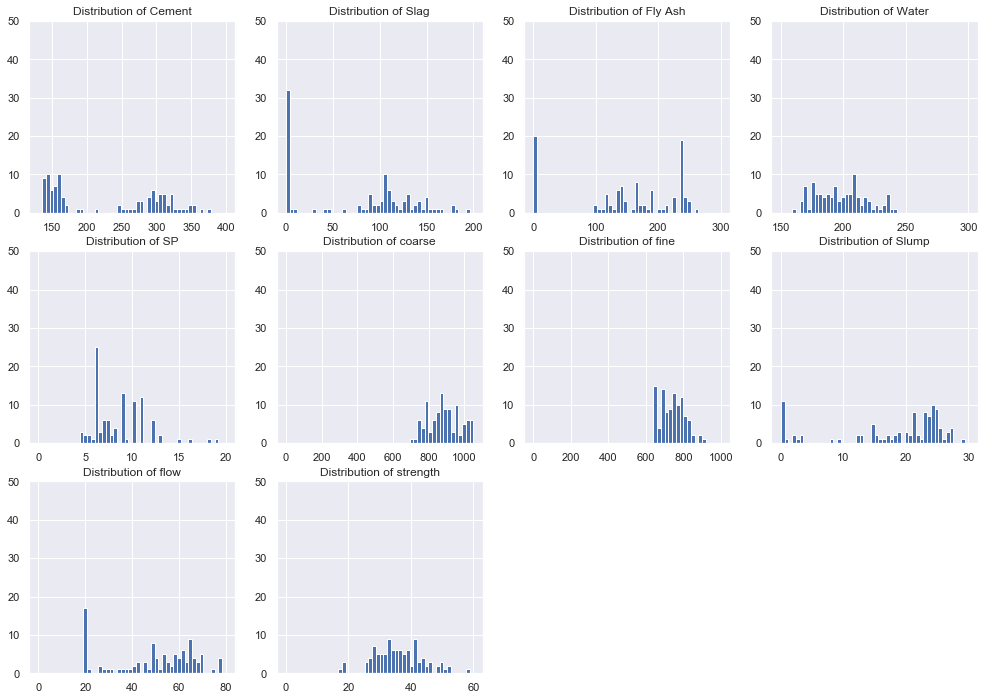

In [12]:
fig = plt.figure(figsize=(17,12))

ax1 = fig.add_subplot(3,4,1)
ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5)
ax6 = fig.add_subplot(3,4,6)
ax7 = fig.add_subplot(3,4,7)
ax8 = fig.add_subplot(3,4,8)
ax9 = fig.add_subplot(3,4,9)
ax10 = fig.add_subplot(3,4,10)


ax1.hist(data.Cement, bins=50, range=(130, 400))
ax1.set_title('Distribution of Cement')
ax1.set_ylim(0, 50)

ax2.hist(data.Slag, 50, range=(0, 200))
ax2.set_title('Distribution of Slag')
ax2.set_ylim(0, 50)

ax3.hist(data.fly_ash, 50, range=(0, 300))
ax3.set_title('Distribution of Fly Ash')
ax3.set_ylim(0, 50)

ax4.hist(data.Water, 50, range=(150, 300))
ax4.set_title('Distribution of Water')
ax4.set_ylim(0, 50)


ax5.hist(data.SP, 50, range=(0, 20))
ax5.set_title('Distribution of SP')
ax5.set_ylim(0, 50)

ax6.hist(data.coarse, 50, range=(0, 1050))
ax6.set_title('Distribution of coarse')
ax6.set_ylim(0, 50)

ax7.hist(data.fine, 50, range=(0, 1000))
ax7.set_title('Distribution of fine')
ax7.set_ylim(0, 50)

ax8.hist(data.slump, 50, range=(0, 30))
ax8.set_title('Distribution of Slump')
ax8.set_ylim(0, 50)

ax9.hist(data.flow, 50, range=(0, 80))
ax9.set_title('Distribution of flow')
ax9.set_ylim(0, 50)

ax10.hist(data.strength, 50, range=(0, 60))
ax10.set_title('Distribution of strength')
ax10.set_ylim(0, 50)


plt.show()

In [13]:
## Since the variables are not very normal, log them
## Add 1 to each value to avoid divsion by zero

data['log_cement'] = np.log(data['Cement']+1)
data['log_slag'] = np.log(data['Slag']+1)
data['log_flyash'] = np.log(data['fly_ash']+1)
data['log_water'] = np.log(data['Water']+1)
data['log_sp'] = np.log(data['SP']+1)
data['log_coarse'] = np.log(data['coarse']+1)
data['log_fine'] = np.log(data['fine']+1)
data['log_slump'] = np.log(data['slump']+1)
data['log_flow'] = np.log(data['flow']+1)
data['log_strength'] = np.log(data['strength']+1)

In [14]:
data.describe()

,Cement,Slag,fly_ash,Water,SP,coarse,fine,slump,flow,strength,log_cement,log_slag,log_flyash,log_water,log_sp,log_coarse,log_fine,log_slump,log_flow,log_strength
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417,5.381645,3.223321,4.181468,5.284001,2.216294,6.780610,6.603870,2.644919,3.845578,3.588719
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232,0.351908,2.178595,2.077481,0.101512,0.277017,0.100140,0.085130,1.048683,0.428496,0.221034
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000,4.927254,0.000000,0.000000,5.081404,1.686399,6.563856,6.463965,0.000000,3.044522,2.900872
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000,5.030438,0.047655,4.757882,5.198497,1.945910,6.709912,6.530148,2.740840,3.676221,3.462604
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000,5.517453,4.615121,5.105945,5.283204,2.197225,6.779922,6.611638,3.113515,4.007333,3.597860
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000,5.719984,4.836250,5.467839,5.349483,2.397895,6.860454,6.670766,3.218876,4.170526,3.742538
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000,5.926926,5.267858,5.564520,5.484797,2.995732,6.957402,6.805723,3.401197,4.369448,4.086480


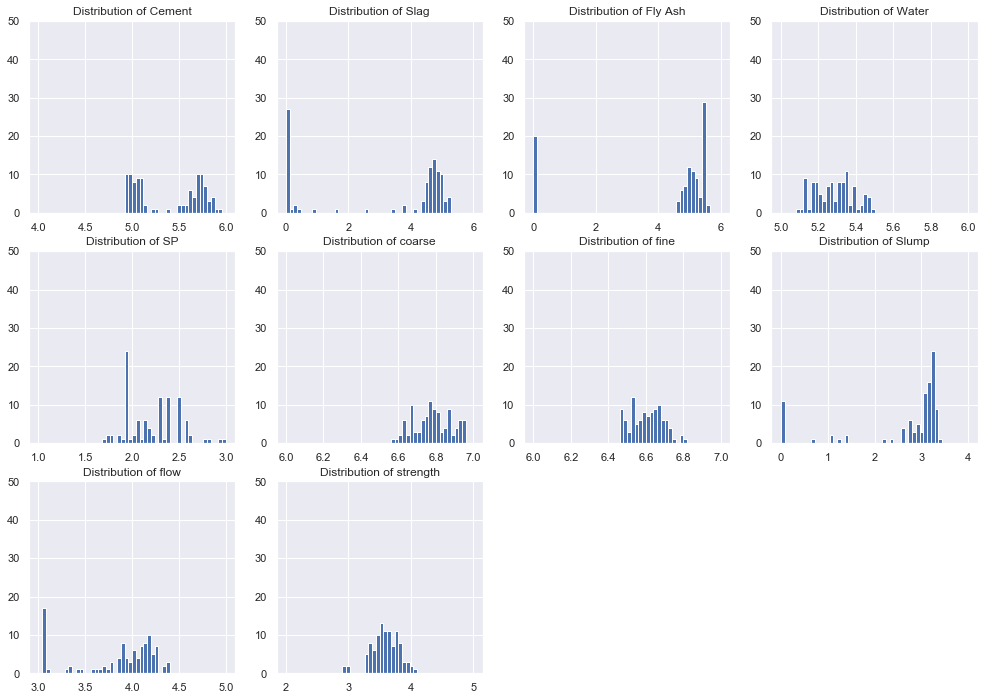

In [15]:
## Check the distribution again on logged variables

fig = plt.figure(figsize=(17,12))

ax1 = fig.add_subplot(3,4,1)
ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5)
ax6 = fig.add_subplot(3,4,6)
ax7 = fig.add_subplot(3,4,7)
ax8 = fig.add_subplot(3,4,8)
ax9 = fig.add_subplot(3,4,9)
ax10 = fig.add_subplot(3,4,10)


ax1.hist(data.log_cement, bins=50, range=(4, 6))
ax1.set_title('Distribution of Cement')
ax1.set_ylim(0, 50)

ax2.hist(data.log_slag, 50, range=(0, 6))
ax2.set_title('Distribution of Slag')
ax2.set_ylim(0, 50)

ax3.hist(data.log_flyash, 50, range=(0, 6))
ax3.set_title('Distribution of Fly Ash')
ax3.set_ylim(0, 50)

ax4.hist(data.log_water, 50, range=(5, 6))
ax4.set_title('Distribution of Water')
ax4.set_ylim(0, 50)

ax5.hist(data.log_sp, 50, range=(1, 3))
ax5.set_title('Distribution of SP')
ax5.set_ylim(0, 50)

ax6.hist(data.log_coarse, 50, range=(6, 7))
ax6.set_title('Distribution of coarse')
ax6.set_ylim(0, 50)

ax7.hist(data.log_fine, 50, range=(6, 7))
ax7.set_title('Distribution of fine')
ax7.set_ylim(0, 50)

ax8.hist(data.log_slump, 50, range=(0, 4))
ax8.set_title('Distribution of Slump')
ax8.set_ylim(0, 50)

ax9.hist(data.log_flow, 50, range=(3, 5))
ax9.set_title('Distribution of flow')
ax9.set_ylim(0, 50)

ax10.hist(data.log_strength, 50, range=(2, 5))
ax10.set_title('Distribution of strength')
ax10.set_ylim(0, 50)


plt.show()

**Key Takeaways from the diagnostics and EDA**

1. There are no missing values in the dataset
2. All variables are true continuous, that is to say they have fractional values (and are not counts data). This implies that we can run linear regression models on them.
3. The key response variable 'strength' (or concrete strength) has a mean 28-day compressive strength of 36 mpa, with a low of 17 and a high of 58.
4. In contrast, flow and slump, the other two outcome variables have means of 50 cm and 18 cm respectively. 
5. While water, SP, coarse, and fine are reasonably normally distributed, the other explanatory variables are not very normal.
6. Among the three outcome variables, only strength is reasonably normally distributed. 
7. Logging the variables helps to reduce elasticity, but did not help much making the variables appear more normal.
8. For the multivariate regressions, taking the log is not necessary, especially since tree-based models are more flexible with respect to the functional form of the variables. Logged variables are also harded to interpret.

**Obtain the correlations of the different variables with each other**

In [16]:
## Create a correlation matrix to check the correlation betweent the different variables
## First on the non-log variables
## Subset the dataset to extract the non-logged variables

nonlogdf = data[['Cement', 'Slag', 'fly_ash', 'Water', 'SP', 'fine', 'slump', 'flow', 'strength']]

nonlogdf.corr(method='pearson')

,Cement,Slag,fly_ash,Water,SP,fine,slump,flow,strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.183522,-0.284037,-0.327231,-0.331588
fly_ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,0.058290,-0.212902,-0.176314,-0.037871
fine,0.056959,-0.183522,-0.282854,0.114591,0.058290,1.000000,0.202272,0.190370,-0.154484
slump,0.145913,-0.284037,-0.118621,0.466568,-0.212902,0.202272,1.000000,0.906135,-0.223358
flow,0.186461,-0.327231,-0.055423,0.632026,-0.176314,0.190370,0.906135,1.000000,-0.124029
strength,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.154484,-0.223358,-0.124029,1.000000


**Key takeaways from the table of correlation coefficients**

1. The correlation coefficients show that on the whole the different variables are not well correlated with each other.
2. Strength (that is, 28 day compression strength of concrete) is most strongly correlated with cement and with fly ash.
3. Concrete flow (pourability of concrete) and concrete slump (or the workability of concrete) are very strongly correlated with each other (r = 0.91 or 91% correlation).
4. Water and concrete flow have a reasonably high correlation at r = 0.63 (or 63%). 
5. Water has a correlation of 0.47 (about 47%) with concrete slump.
6. Fly ash is negatively correlated with cement with r = -0.49. It's not a strong negative correlation, but is indicative of the direction of the correlation.

In [17]:
## Now on the logged variables
## Subset the dataset to extract only the logged variables.
## Overall the unlogged variables seem to have a stronger correlation with each other.

logdf = data[['log_cement', 'log_slag', 'log_flyash', 'log_water', 'log_sp', 'log_fine', 'log_slump', 'log_flow', 'log_strength']]

logdf.corr(method='pearson')


,log_cement,log_slag,log_flyash,log_water,log_sp,log_fine,log_slump,log_flow,log_strength
log_cement,1.000000,-0.195120,-0.379938,0.215895,-0.031021,0.056626,0.116115,0.160834,0.445966
log_slag,-0.195120,1.000000,-0.276099,-0.033201,0.197682,-0.221080,-0.234823,-0.264072,-0.317895
log_flyash,-0.379938,-0.276099,1.000000,-0.213256,-0.156649,-0.179844,-0.086490,-0.005236,0.515797
log_water,0.215895,-0.033201,-0.213256,1.000000,-0.114987,0.124622,0.483626,0.598135,-0.234879
log_sp,-0.031021,0.197682,-0.156649,-0.114987,1.000000,0.067863,-0.188947,-0.157433,-0.047313
log_fine,0.056626,-0.221080,-0.179844,0.124622,0.067863,1.000000,0.208836,0.212371,-0.160190
log_slump,0.116115,-0.234823,-0.086490,0.483626,-0.188947,0.208836,1.000000,0.881326,-0.255380
log_flow,0.160834,-0.264072,-0.005236,0.598135,-0.157433,0.212371,0.881326,1.000000,-0.135189
log_strength,0.445966,-0.317895,0.515797,-0.234879,-0.047313,-0.160190,-0.255380,-0.135189,1.000000


**Plot the correlation between the variables to understand the relationship better**

*The exercise only asks for this to be done for 28-day concrete strength, but to get a better understanding of the data, I have done it for all three outcome variables -- concrete slump, concrete flow, and concrete strength*

**First create the scatterplots for concrete slump**

Text(0, 0.5, 'Slump')

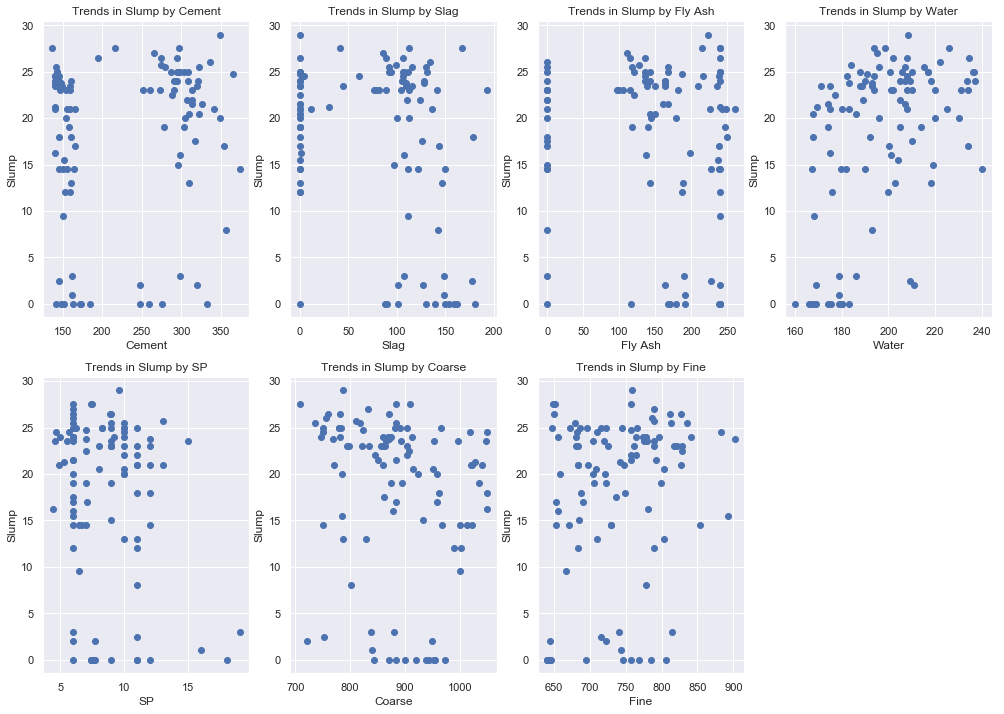

In [18]:
## Plot a scatterplot matrix for the three outcome variables by the explanatory variables
## Try for the unlogged variables only.
## First for slump

fig = plt.figure(figsize = (17,12))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)

ax1.scatter(data.Cement, data.slump)
ax1.set_title('Trends in Slump by Cement')
ax1.set_xlabel('Cement')
ax1.set_ylabel('Slump')

ax2.scatter(data.Slag, data.slump)
ax2.set_title('Trends in Slump by Slag')
ax2.set_xlabel('Slag')
ax2.set_ylabel('Slump')

ax3.scatter(data.fly_ash, data.slump)
ax3.set_title('Trends in Slump by Fly Ash')
ax3.set_xlabel('Fly Ash')
ax3.set_ylabel('Slump')

ax4.scatter(data.Water, data.slump)
ax4.set_title('Trends in Slump by Water')
ax4.set_xlabel('Water')
ax4.set_ylabel('Slump')

ax5.scatter(data.SP, data.slump)
ax5.set_title('Trends in Slump by SP')
ax5.set_xlabel('SP')
ax5.set_ylabel('Slump')

ax6.scatter(data.coarse, data.slump)
ax6.set_title('Trends in Slump by Coarse')
ax6.set_xlabel('Coarse')
ax6.set_ylabel('Slump')

ax7.scatter(data.fine, data.slump)
ax7.set_title('Trends in Slump by Fine')
ax7.set_xlabel('Fine')
ax7.set_ylabel('Slump')

**Key points from the scatterplot of concrete slump:**

1. The scatterplot matrix bears out the correlation matrix, and shows that concrete slump is weakly correlated with all explanatory variables, except perhaps water.
2. The correlation between water and concrete slump is positive and linear, though not very strong. This indicates that as the volume of water increases, so does the concrete slump (or the workability of the concrete).

**Try putting slump into bins to see if it makes interpreting the scatterplot easier**

In [19]:
## Put the slump variable into a bin to make it easier to interpret

data['slump_bin'] = pd.cut(data.slump, 15, labels=False)

Text(0, 0.5, 'slump_bin')

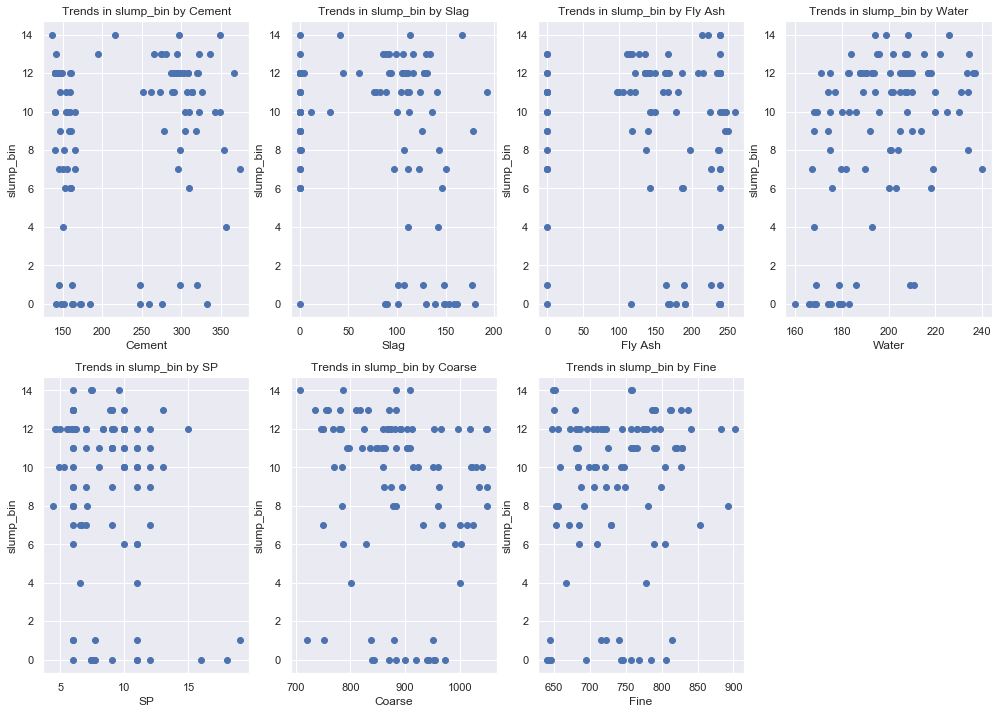

In [20]:
fig = plt.figure(figsize = (17,12))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)

ax1.scatter(data.Cement, data.slump_bin)
ax1.set_title('Trends in slump_bin by Cement')
ax1.set_xlabel('Cement')
ax1.set_ylabel('slump_bin')

ax2.scatter(data.Slag, data.slump_bin)
ax2.set_title('Trends in slump_bin by Slag')
ax2.set_xlabel('Slag')
ax2.set_ylabel('slump_bin')

ax3.scatter(data.fly_ash, data.slump_bin)
ax3.set_title('Trends in slump_bin by Fly Ash')
ax3.set_xlabel('Fly Ash')
ax3.set_ylabel('slump_bin')

ax4.scatter(data.Water, data.slump_bin)
ax4.set_title('Trends in slump_bin by Water')
ax4.set_xlabel('Water')
ax4.set_ylabel('slump_bin')

ax5.scatter(data.SP, data.slump_bin)
ax5.set_title('Trends in slump_bin by SP')
ax5.set_xlabel('SP')
ax5.set_ylabel('slump_bin')

ax6.scatter(data.coarse, data.slump_bin)
ax6.set_title('Trends in slump_bin by Coarse')
ax6.set_xlabel('Coarse')
ax6.set_ylabel('slump_bin')

ax7.scatter(data.fine, data.slump_bin)
ax7.set_title('Trends in slump_bin by Fine')
ax7.set_xlabel('Fine')
ax7.set_ylabel('slump_bin')

**Key points from scatterplot of concrete slump above:**

1. Dividing concrete slump into bins did not make any difference to the weak correlation between this outcome and the other explanatory variables. 


**Plot the scatterplot matrix for concrete flow**

Text(0, 0.5, 'Flow')

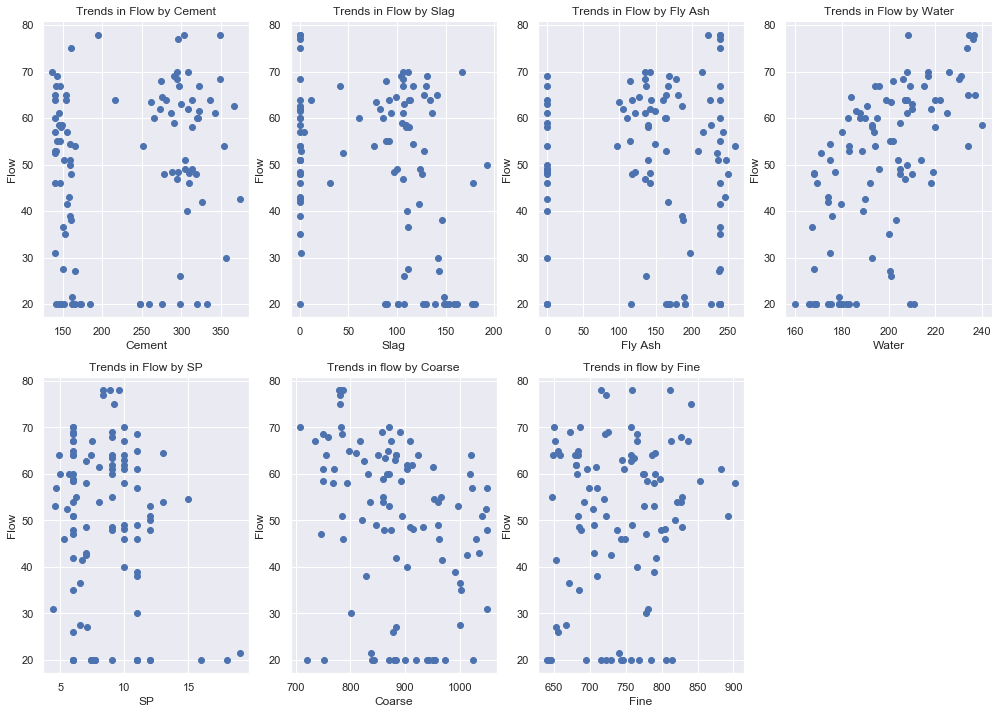

In [21]:
## Plot a scatterplot matrix for flow against the explanatory variables

fig = plt.figure(figsize = (17,12))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)

ax1.scatter(data.Cement, data.flow)
ax1.set_title('Trends in Flow by Cement')
ax1.set_xlabel('Cement')
ax1.set_ylabel('Flow')

ax2.scatter(data.Slag, data.flow)
ax2.set_title('Trends in Flow by Slag')
ax2.set_xlabel('Slag')
ax2.set_ylabel('Flow')

ax3.scatter(data.fly_ash, data.flow)
ax3.set_title('Trends in Flow by Fly Ash')
ax3.set_xlabel('Fly Ash')
ax3.set_ylabel('Flow')

ax4.scatter(data.Water, data.flow)
ax4.set_title('Trends in Flow by Water')
ax4.set_xlabel('Water')
ax4.set_ylabel('Flow')

ax5.scatter(data.SP, data.flow)
ax5.set_title('Trends in Flow by SP')
ax5.set_xlabel('SP')
ax5.set_ylabel('Flow')

ax6.scatter(data.coarse, data.flow)
ax6.set_title('Trends in flow by Coarse')
ax6.set_xlabel('Coarse')
ax6.set_ylabel('Flow')

ax7.scatter(data.fine, data.flow)
ax7.set_title('Trends in flow by Fine')
ax7.set_xlabel('Fine')
ax7.set_ylabel('Flow')

**Key points from scatterplot of concrete flow above:**

1. As with concrete slump, with which concrete flow is very strongly correlated, concrete flow is weakly correlated with all explanatory variables, except water.
2. The scatterplot shows that the relationship between concrete flow and water is linear and positive, indicating that as water volume increases, so does the flow of the concrete. 

**Split concrete flow into bins to see if it makes a difference to the readability of the scatterplots**

In [22]:
## Put the flow variable into a bin to make it easier to interpret

data['flow_bin'] = pd.cut(data.flow, 15, labels=False)

Text(0, 0.5, 'flow_bin')

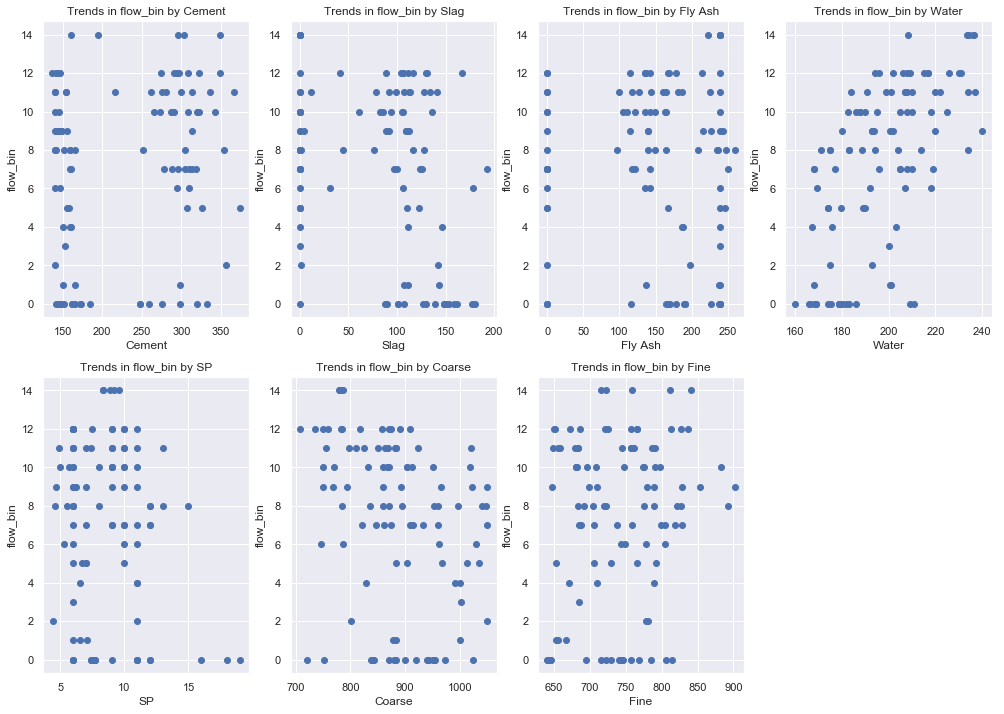

In [23]:
## Plot a scatterplot matrix for flow_bin against the explanatory variables

fig = plt.figure(figsize = (17,12))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)

ax1.scatter(data.Cement, data.flow_bin)
ax1.set_title('Trends in flow_bin by Cement')
ax1.set_xlabel('Cement')
ax1.set_ylabel('flow_bin')

ax2.scatter(data.Slag, data.flow_bin)
ax2.set_title('Trends in flow_bin by Slag')
ax2.set_xlabel('Slag')
ax2.set_ylabel('flow_bin')

ax3.scatter(data.fly_ash, data.flow_bin)
ax3.set_title('Trends in flow_bin by Fly Ash')
ax3.set_xlabel('Fly Ash')
ax3.set_ylabel('flow_bin')

ax4.scatter(data.Water, data.flow_bin)
ax4.set_title('Trends in flow_bin by Water')
ax4.set_xlabel('Water')
ax4.set_ylabel('flow_bin')

ax5.scatter(data.SP, data.flow_bin)
ax5.set_title('Trends in flow_bin by SP')
ax5.set_xlabel('SP')
ax5.set_ylabel('flow_bin')

ax6.scatter(data.coarse, data.flow_bin)
ax6.set_title('Trends in flow_bin by Coarse')
ax6.set_xlabel('Coarse')
ax6.set_ylabel('flow_bin')

ax7.scatter(data.fine, data.flow_bin)
ax7.set_title('Trends in flow_bin by Fine')
ax7.set_xlabel('Fine')
ax7.set_ylabel('flow_bin')

**Key points from scatterplot of binned concrete flow above:**

1. The scatterplot matrix of binned concrete flow only heightens the impression of lack of correlation between the different variables with flow.
2. Water looks largely linear and positively correlated with concrete flow. 

**Plot a scatterplot matrix for 28-day concrete strength -- this is asked for in the exercise**

Text(0, 0.5, 'Strength')

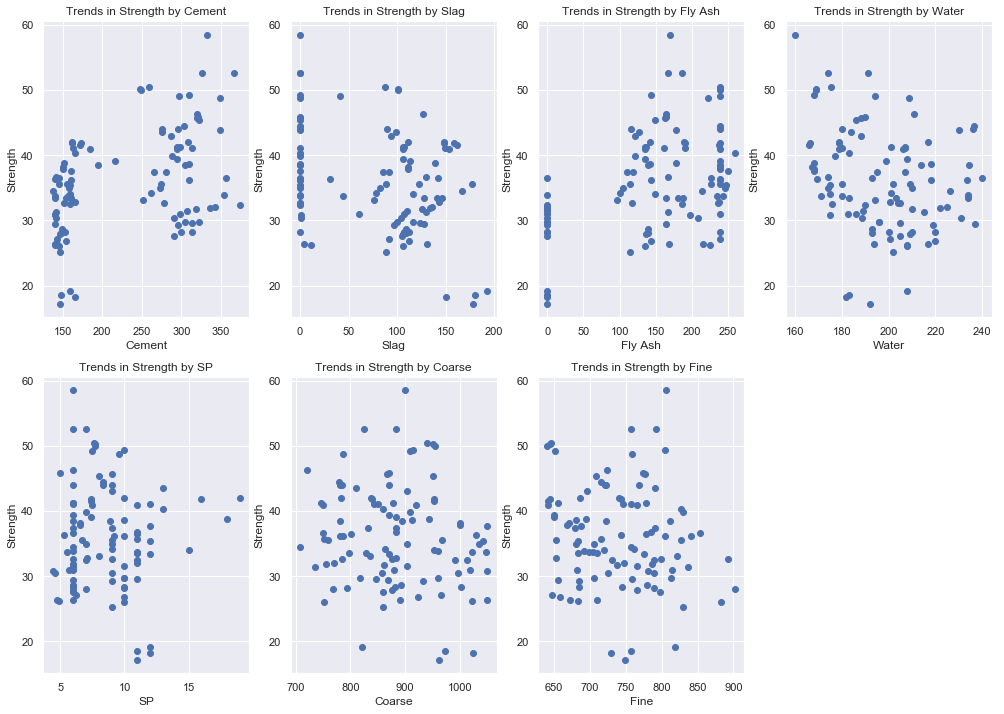

In [24]:
## Plot a scatterplot matrix for strength

fig = plt.figure(figsize = (17,12))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)

ax1.scatter(data.Cement, data.strength)
ax1.set_title('Trends in Strength by Cement')
ax1.set_xlabel('Cement')
ax1.set_ylabel('Strength')

ax2.scatter(data.Slag, data.strength)
ax2.set_title('Trends in Strength by Slag')
ax2.set_xlabel('Slag')
ax2.set_ylabel('Strength')

ax3.scatter(data.fly_ash, data.strength)
ax3.set_title('Trends in Strength by Fly Ash')
ax3.set_xlabel('Fly Ash')
ax3.set_ylabel('Strength')

ax4.scatter(data.Water, data.strength)
ax4.set_title('Trends in Strength by Water')
ax4.set_xlabel('Water')
ax4.set_ylabel('Strength')

ax5.scatter(data.SP, data.strength)
ax5.set_title('Trends in Strength by SP')
ax5.set_xlabel('SP')
ax5.set_ylabel('Strength')

ax6.scatter(data.coarse, data.strength)
ax6.set_title('Trends in Strength by Coarse')
ax6.set_xlabel('Coarse')
ax6.set_ylabel('Strength')

ax7.scatter(data.fine, data.strength)
ax7.set_title('Trends in Strength by Fine')
ax7.set_xlabel('Fine')
ax7.set_ylabel('Strength')

**Key points from scatterplot above:**

1. the 28-day compression strenght of concrete has a curvilinear relationship with cement. It would appear that initiall the strength of concrete rises as cement quantity increases, before dropping of at about 200 units of cement. However, when the cement quantity increases to about 300 units, the strength of concrete increases again. 
2. While the table of correlation coefficients indicates a stronger correlation of concrete strength with fly ash than with other variables, it is not very marked in the scatterplots.
3. However water has a negative and linear relationship with concrete strength.
4. The other variables are weakly correlated with concrete strength.

**Split the concrete strength variable into bins as requested in the exercise**

In [25]:
## Put the strength variable into a bin to make it easier to interpret

data['str_bin'] = pd.cut(data.strength, 15, labels=False)

Text(0, 0.5, 'str_bin')

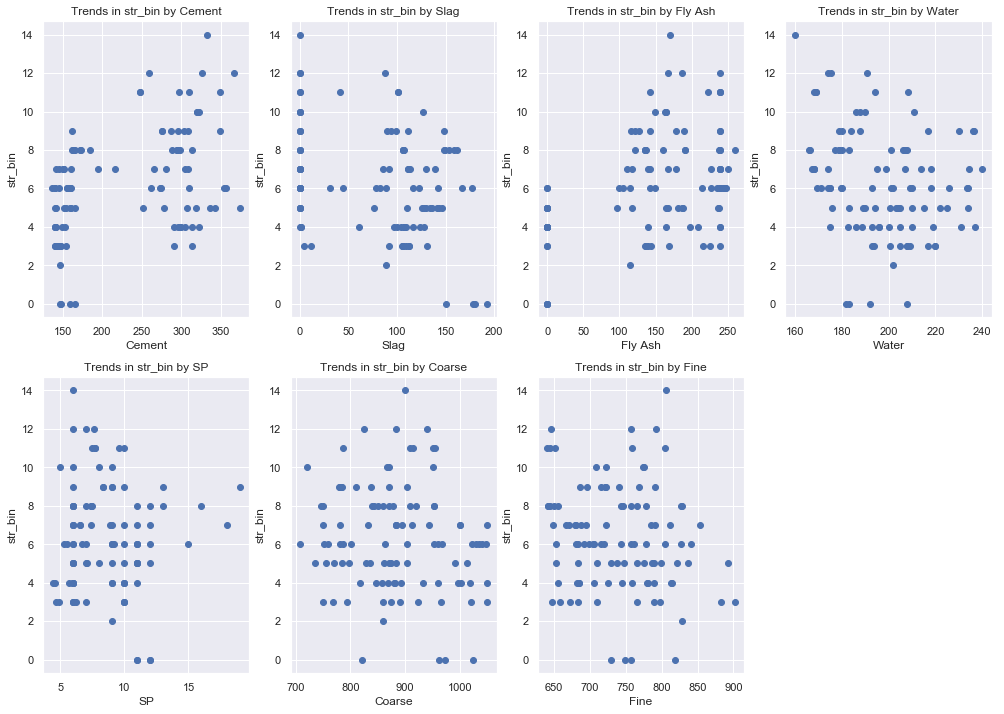

In [26]:
fig = plt.figure(figsize = (17,12))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)

ax1.scatter(data.Cement, data.str_bin)
ax1.set_title('Trends in str_bin by Cement')
ax1.set_xlabel('Cement')
ax1.set_ylabel('str_bin')

ax2.scatter(data.Slag, data.str_bin)
ax2.set_title('Trends in str_bin by Slag')
ax2.set_xlabel('Slag')
ax2.set_ylabel('str_bin')

ax3.scatter(data.fly_ash, data.str_bin)
ax3.set_title('Trends in str_bin by Fly Ash')
ax3.set_xlabel('Fly Ash')
ax3.set_ylabel('str_bin')

ax4.scatter(data.Water, data.str_bin)
ax4.set_title('Trends in str_bin by Water')
ax4.set_xlabel('Water')
ax4.set_ylabel('str_bin')

ax5.scatter(data.SP, data.str_bin)
ax5.set_title('Trends in str_bin by SP')
ax5.set_xlabel('SP')
ax5.set_ylabel('str_bin')

ax6.scatter(data.coarse, data.str_bin)
ax6.set_title('Trends in str_bin by Coarse')
ax6.set_xlabel('Coarse')
ax6.set_ylabel('str_bin')

ax7.scatter(data.fine, data.str_bin)
ax7.set_title('Trends in str_bin by Fine')
ax7.set_xlabel('Fine')
ax7.set_ylabel('str_bin')

**Key points from the scatterplot above:**

1. The scatterplot with the binned concrete strength variable bears out the patterns seen in un-binned variable. The curvilinear relationship between concrete strength and cement is more marked here. 
2. Water also has a distinctly negative and linear relationship with concrete strength.

## Decision Trees and Random Forests

### Decision Tree

In [127]:
## First import all relevant libraries

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
tree_model = tree.DecisionTreeRegressor()

import sklearn.model_selection as ms
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from collections import Counter
import math
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

**I have included only cement and fly-ash in the feature set below (the exercise asks for only 2 to be included), although the interpretation of the correlation between fly-ash and concrete strenght is more nebulous in the scatterplot. This is because the table of correlation coefficients is a much more reliable indicator of the strength of the relationship between the variables.**

In [113]:
## Set up the X and Y variables
## The X variable set only includes the two most important as per the correlation coefficient and the scatterplots.
## The Y variable is compression strength of cement (coded as just strength here for ease)


XFeatures = data[['Cement','fly_ash']].copy()
YStrength = data['strength']

In [116]:
## Now do the train-test split

train_error = []
test_error = []
train_score = []
test_score = []

x_train, x_test, y_train, y_test = ms.train_test_split(XFeatures, YStrength, 
                                                       test_size=1.0/3, random_state=0)

print('Original: {}, {}'.format(XFeatures.shape, YStrength.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test: {}, {}'.format(x_test.shape, y_test.shape))

Original: (103, 2), (103,)
Training: (68, 2), (68,)
Test: (35, 2), (35,)


In [117]:
## Now fit the decision tree model without the 10-fold cross-validation:

tree_model.fit(x_train, y_train)

train_error = (1 - tree_model.score(x_train, y_train))
test_error = (1 - tree_model.score(x_test, y_test))

train_score = (tree_model.score(x_train, y_train))
test_score = (tree_model.score(x_test, y_test))

print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

print("The training R^2 is: %.5f" %train_score)
print("The test     R^2 is: %.5f" %test_score)

The training error is: 0.02211
The test     error is: 0.26084
The training R^2 is: 0.97789
The test     R^2 is: 0.73916


In [120]:
dt = tree_model.fit(x_train, y_train)
y_pred = dt.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("DT MSE (no CV): {}".format(mse))
print("DT RMSE (no CV): {}".format(rmse))

DT MSE (no CV): 15.552932857142858
DT RMSE (no CV): 3.943720687009015


In [122]:
## Now do the 10 fold cross-validation and the hyperparameter tuning

dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)

dtm.fit(x_test,y_test)   
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))


param_grid = [{
    "criterion": ["mse", "mae"],
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "max_depth": [2, 6, 8],
    "min_samples_leaf": [20, 40, 100],
    "max_leaf_nodes": [5, 20, 100],
}]

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=10)

grid_cv_dtm.fit(x_train, y_train)

R-Squared on test dataset=0.8930676423653339


C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['mse', 'mae'], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'max_depth': [2, 6, 8], 'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
## best parameters
grid_cv_dtm.best_params_

{'criterion': 'mse',
 'max_depth': 2,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 8}

In [124]:
## best score
dt_10_r2 = grid_cv_dtm.best_score_
dt_10_r2

-0.24753706923791755

In [126]:
# Checking the training model scores(R^2 and negative MSE)

r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::-0.273
MSE::-50.838


In [129]:
# Checking the test model scores (MSE and RMSE)

r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10,scoring='neg_mean_squared_error')

dtm = grid_cv_dtm.fit(x_train, y_train)
y_pred = dtm.predict(x_test)

dt_10_mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_10_rmse = np.sqrt(mse)

print("DT MSE: {}".format(dt_10_mse))
print("DT RMSE: {}".format(dt_10_rmse))

DT MSE: 57.03722616269125
DT RMSE: 7.552299395726526


C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [128]:
## Test dataset evaluation

best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(x_test)
residuals = y_test - y_pred

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2_score = best_dtm_model.score(x_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: {:.3f}".format(rmse))

R-squared:-0.008
MSE: 57.04
RMSE: 7.552


In [130]:
##Prediction for Decision Tree

y_train_net = grid_cv_dtm.predict(x_train)
y_test_net = grid_cv_dtm.predict(x_test)

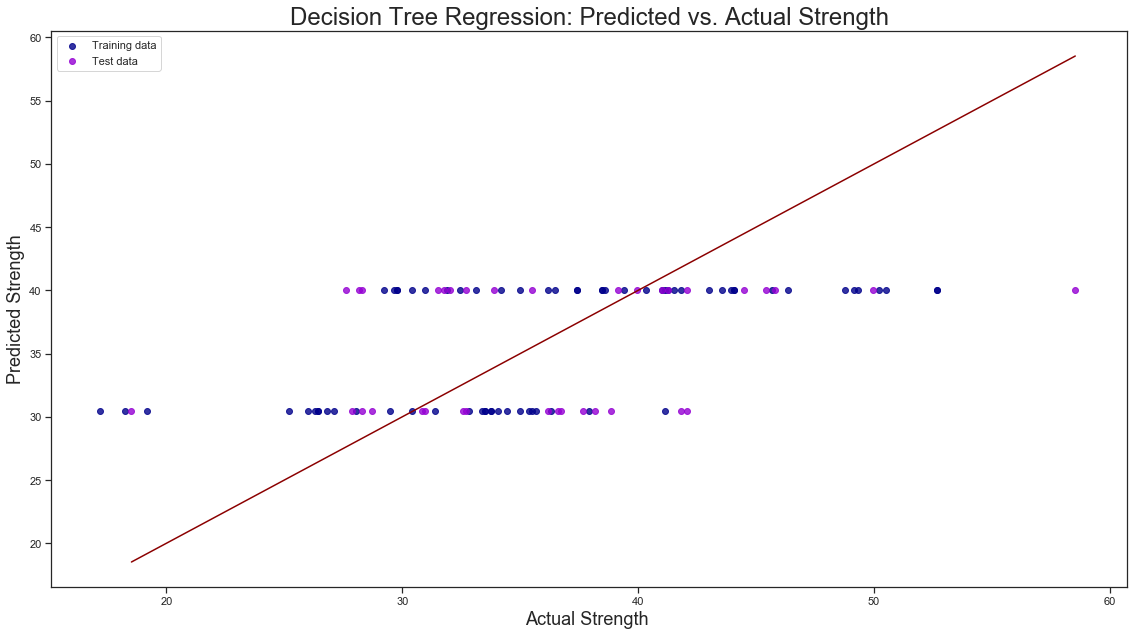

In [132]:
## Prediction for Decision Tree -- graph

plt.figure(figsize=(16, 9))
sns.regplot(x=y_train, y=y_train_net, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_test_net, fit_reg=False, color = 'darkviolet', label = "Test data")
 
plt.title('Decision Tree Regression: Predicted vs. Actual Strength', fontsize=24)
plt.xlabel('Actual Strength ', fontsize=18)
plt.ylabel('Predicted Strength', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

**Key points from the Decision Tree Model:**

1. The Decision Tree is a very poor prediction model in general. It can be seen here quite starkly. The R-square of the model (that is the amount of variance explained by the model) is less than 1%. 
2. The Root Mean Square error (RMSE), or the amount of error in the model, is also fairly high at about 7.6. 
3. The maximum depth of the tree, according to the grid search 10-fold cross-validation is 2.
4. The graph shows the fit of the decision tree model. Since the tree splits at each node, the fit of the decision tree in the graph shows up in a step-wise manner. In this case, there are two nodes along which the observations were split. 

### Random Forest Model

In [133]:
## First import the libraries

from sklearn.ensemble import RandomForestRegressor
randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

In [134]:
## Fit the random forest without the 10-fold CV and train-test split

randomForest.set_params(random_state=42, n_estimators=5000, max_features=2)
randomForest.fit(XFeatures, YStrength) # fit 
randomForest.score(XFeatures, YStrength) # accuracy

0.9535040571081892

In [135]:
randomForest.set_params(random_state=42, n_estimators=5000, max_features=2)
randomForest.fit(x_train, y_train) # fit 
randomForest.score(x_train, y_train) # accuracy

0.9472442657208658

In [136]:
y_pred = randomForest.predict(x_test)
#residuals = y_test - y_pred

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: {:.3f}".format(rmse))

MSE: 12.66
RMSE: 3.559


In [138]:
## GridSearchCV on Random Forests

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)


# Fit the random search model
rf_grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 10.3min finished
C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [139]:
rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [140]:
rf_10_r2 = rf_grid_search.best_score_
rf_10_r2

0.3440229614749685

In [142]:
y_pred = rf_grid_search.predict(x_test)

rf_10_mse = mean_squared_error(y_test, y_pred)
rf_10_rmse = np.sqrt(mse)

print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: {:.3f}".format(rmse))

MSE: 14.90
RMSE: 3.559


In [143]:
# Predict the values of Strength for training and validation datasets

y_rf_train = rf_grid_search.predict(x_train)
y_rf_test = rf_grid_search.predict(x_test)

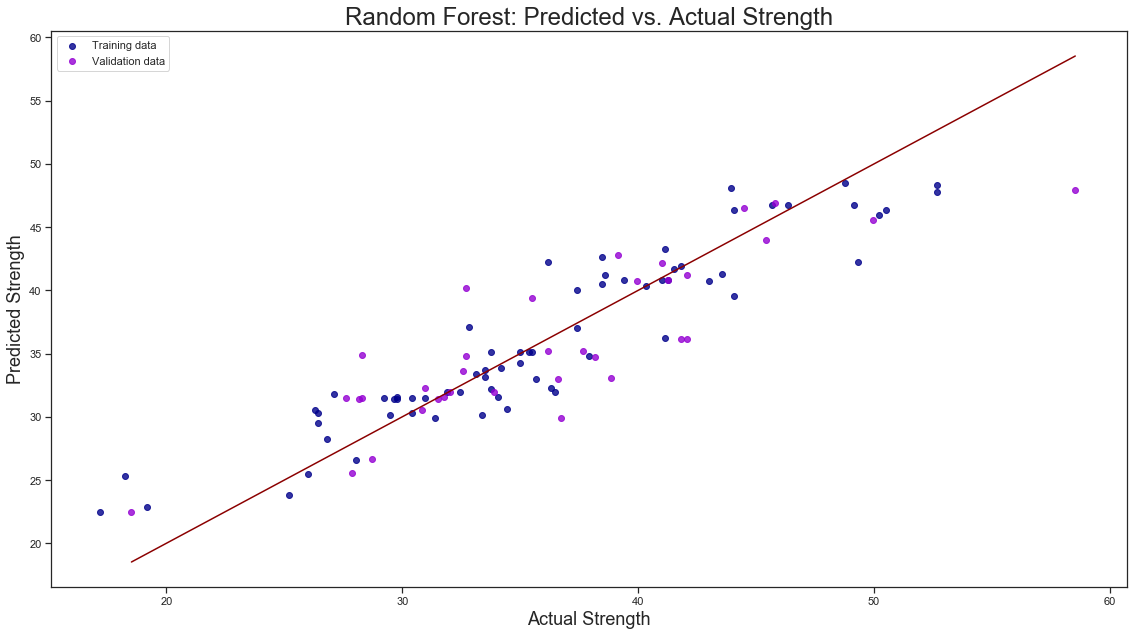

In [144]:
##How does RF perform on predicted saleprice relative to the actual saleprice (graph)

plt.figure(figsize=(16, 9))

sns.regplot(x=y_train, y=y_rf_train, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_rf_test, fit_reg=False, color = 'darkviolet', label = "Validation data")

plt.title('Random Forest: Predicted vs. Actual Strength', fontsize=24)
plt.xlabel('Actual Strength', fontsize=18)
plt.ylabel('Predicted Strength', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

**Key points from the Random Forest Regression:**

1. This is a much superior model compared with the decision tree. Although it is made of multiple decision trees using the ensembling technique, the fit of the observations around the random forest model is better than the decision tree. 
2. The R-square for this model is about 0.34, that is the model explains about 34% of the variance in the outcome variable (concrete strength). 
3. The root mean squared error (or the amount of error in the model) is also much lower than the decision tree model at about 3.6. 
4. The optimum number of trees in the RF model (according to the grid search cross-validation technique) is 200 trees.
5. These are very short trees since there are only three leaves.
6. The RF only accounts for two features, since there are only 2 features in the features set.
7. The graph shows that the data fit better around the random forest regression line, although this model too splits data along different nodes.

**Future directions:**

1. Ideally more machine learning models need to be run on these data, including regularized regressions such as ridge and lasso, as well as gradient boosting and SVM regressions. These are superior prediction techniques, and would likely increase the R-square (or variance explained), while simultaneously reducing the model error (the RMSE).

2. Adding multiple machine learning algorithms to the mix allows for model stacking at a future point, leading to a superior prediction of cement strength. 

3. Additional models should also include the other explanatory variables, given how few there are in the dataset. Further, cement should be made a cubic variable given that it has two inflexion points.

4. Prediction models such as this for better understanding cement strength has industrial applications, since concrete is key to buildings across the world. It is imperative to understand what contributes to higher cement strength in order to build better buildings everywhere. 

5. Additional variables that could be included in the dataset but aren't incuded in the current dataset: steel girders. 